An analysis of Surface air temperature effects on evapotranspiration rate and soil moisture

Suvam Patel

In [1]:
import numpy as np
import matplotlib.pyplot as py
import xarray
import cartopy
import cartopy.util    
import cartopy.feature
import scipy.stats as stats

In [2]:
# Surface air temperature analysis
filename = "tas_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc"
nc_file = xarray.open_dataset(filename)
# print(nc_file)

tashistorical = nc_file["tas"].data
timehistorical = nc_file["time"].data
lat = nc_file["lat"].data
lon = nc_file["lon"].data

print("Temperature units:", nc_file["tas"].units)
print("Lat units:", nc_file["lat"].units)
print("Lon units:", nc_file["lon"].units)

# tas future
filename = "tas_Amon_ACCESS-ESM1-5_ssp370_r1i1p1f1_gn_201501-210012.nc"
nc_file = xarray.open_dataset(filename)
# print(nc_file)

tasfuture = nc_file["tas"].data
timefuture = nc_file["time"].data

# append historical and future temperature data
tasdata = np.append(tashistorical, tasfuture, axis=0)
print(tasdata.shape)

# append historical and future time data
timedata = np.append(timehistorical, timefuture, axis=0)
print(timedata.shape)

# convert time series from Kelvin to Celsius
tasdata = tasdata - 273.15

# variable to hold time
print ("\nNumber of Months in timeseries: ")

nmonths    = 12
nyears     = (len(timehistorical) + len(timefuture))/nmonths
nyears     = int(nyears)
date       = np.zeros(nyears)
nmon       = (nyears)*12 
print ("years: ", nyears, "months: ", nmon)

# read netcdf file containing area of each grid cell
filename = "areacella_fx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc"
nc_file = xarray.open_dataset(filename)

areacella = nc_file['areacella'].data
print(nc_file['areacella'].units)
nc_file.close
print("Area of Earth from areacella: {0:0.3e} m2".format(np.sum(areacella)))

# array with global temperature mean estimates
nlat = lat.size
nlon = lon.size
print(nlat, nlon)

tasyearmean    = np.zeros((nyears, nlat, nlon))
globaltas      = np.zeros(nyears)

# average of surface air temperature for individual years
tcounter = 0
for y in range(nyears):
    tasyearmean[y,:,:] = np.average(tasdata[y*12:y*12 + 12, :, :], axis=0)
    globaltas[y] = np.average(tasyearmean[y,:,:], weights=areacella)
    
# Array for time information of annual array
print(nyears)
for i in range(nyears):
    date[i] = 1850.0 + i + 0.5
print("Start year:", date[0], "End year:", date[-1])

# text file
f = open("globaltas.txt", "w")
f.write("This dataset gives the global surface air temperature from 1850 to 2100\n")
f.write("year   , tas.temp\n")
for i in range(nyears):
    f.write ("{0:6.2f}, {1:f} \n".format(date[i], globaltas[i]))
f.close()

Temperature units: K
Lat units: degrees_north
Lon units: degrees_east
(3012, 145, 192)
(3012,)

Number of Months in timeseries: 
years:  251 months:  3012
m2
Area of Earth from areacella: 5.099e+14 m2
145 192
251
Start year: 1850.5 End year: 2100.5


(145, 192) (145, 192)
-49.377842330932616 30.130498123168945
-44.210455152723526 37.05293061998155


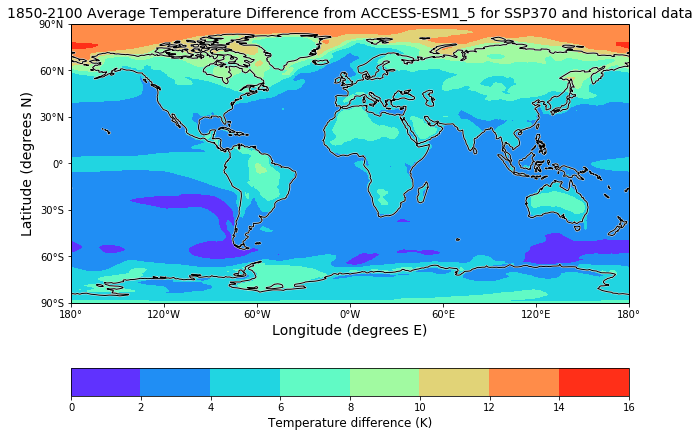

In [3]:
# Global map of air temperature change using cartopy
tasbegin = np.average(tasyearmean[0:10,:,:], axis=0)
tasend = np.average(tasyearmean[-10:-1,:,:], axis=0)
print(tasbegin.shape, tasend.shape)
print(tasbegin.min(), tasbegin.max())
print(tasend.min(), tasend.max())
tasdiff = tasend - tasbegin


from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig1 = py.figure(2, figsize = (10,8))
my_font_size = 12
ax1 = fig1.add_subplot(111,projection=cartopy.crs.PlateCarree())
ax1.add_feature(cartopy.feature.COASTLINE, zorder=100, edgecolor='k')
cyclic_tasdiff, cyclic_lon = cartopy.util.add_cyclic_point(tasdiff, coord=lon, axis=1)
contour_plot = ax1.contourf(cyclic_lon, lat, cyclic_tasdiff, cmap="rainbow")

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=cartopy.crs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=cartopy.crs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax1.set_ylabel("Latitude (degrees N)", fontsize = my_font_size + 2)
ax1.set_xlabel("Longitude (degrees E)", fontsize = my_font_size + 2)
ax1.set_title("1850-2100 Average Temperature Difference from ACCESS-ESM1_5 for SSP370 and historical data", fontsize = my_font_size+ 2)
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('Temperature difference (K)', fontsize = my_font_size)
ax1.coastlines(color='0.9', lw=2.0)

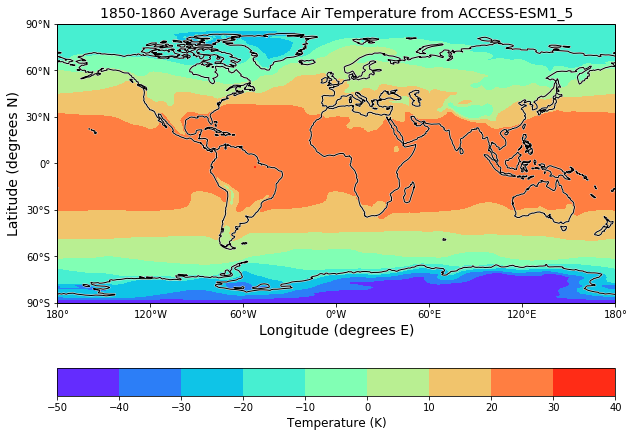

In [4]:
# plot for first 10 years of surface air temperature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig1 = py.figure(2, figsize = (10,8))
my_font_size = 12
ax1 = fig1.add_subplot(111,projection=cartopy.crs.PlateCarree())
ax1.add_feature(cartopy.feature.COASTLINE, zorder=100, edgecolor='k')
cyclic_tasbegin, cyclic_lon = cartopy.util.add_cyclic_point(tasbegin, coord=lon, axis=1)
contour_plot = ax1.contourf(cyclic_lon, lat, cyclic_tasbegin, cmap="rainbow")

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=cartopy.crs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=cartopy.crs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax1.set_ylabel("Latitude (degrees N)", fontsize = my_font_size + 2)
ax1.set_xlabel("Longitude (degrees E)", fontsize = my_font_size + 2)
ax1.set_title("1850-1860 Average Surface Air Temperature from ACCESS-ESM1_5", fontsize = my_font_size+ 2)
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('Temperature (K)', fontsize = my_font_size)
ax1.coastlines(color='0.9', lw=2.0)

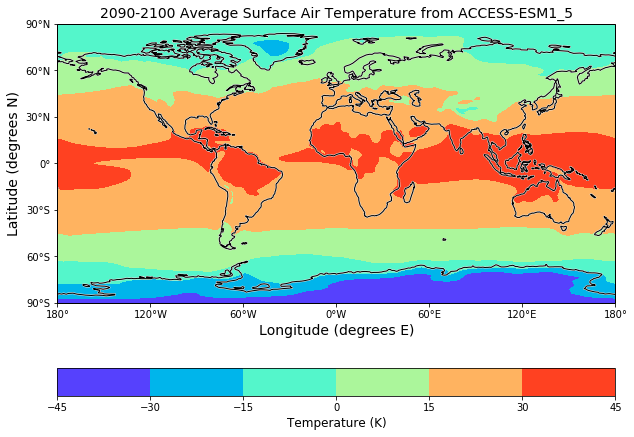

In [5]:
# plot for last 10 years of surface air temperature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig1 = py.figure(2, figsize = (10,8))
my_font_size = 12
ax1 = fig1.add_subplot(111,projection=cartopy.crs.PlateCarree())
ax1.add_feature(cartopy.feature.COASTLINE, zorder=100, edgecolor='k')
cyclic_tasend, cyclic_lon = cartopy.util.add_cyclic_point(tasend, coord=lon, axis=1)
contour_plot = ax1.contourf(cyclic_lon, lat, cyclic_tasend, cmap="rainbow")

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=cartopy.crs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=cartopy.crs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax1.set_ylabel("Latitude (degrees N)", fontsize = my_font_size + 2)
ax1.set_xlabel("Longitude (degrees E)", fontsize = my_font_size + 2)
ax1.set_title("2090-2100 Average Surface Air Temperature from ACCESS-ESM1_5", fontsize = my_font_size+ 2)
cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('Temperature (K)', fontsize = my_font_size)
ax1.coastlines(color='0.9', lw=2.0)

Text(0.5, 1.0, 'CMIP6 global mean Surface Air Temperature from ACCESS-ESM1-5')

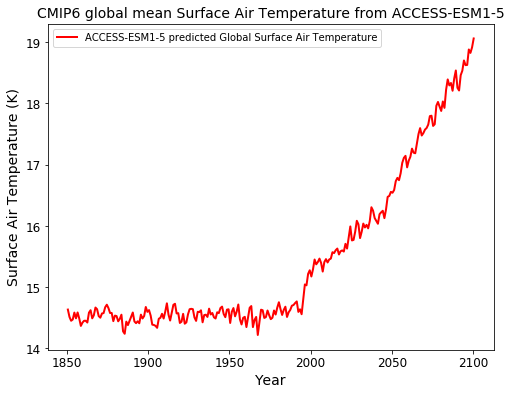

In [6]:
# Global time series temperature change
py.close(1)
fig1 = py.figure(1,figsize=(8,6)) 
my_font_size = 12
ax1 = fig1.add_subplot(1,1,1) 
ax1.plot(date,  globaltas, color="red", label="ACCESS-ESM1-5 predicted Global Surface Air Temperature", linewidth=2)
ax1.set_ylabel("Surface Air Temperature (K)", fontsize = my_font_size + 2)
ax1.set_xlabel("Year", fontsize = my_font_size+ 2)
ax1.tick_params(labelsize = my_font_size)
ax1.legend(loc = "upper left")
ax1.set_title("CMIP6 global mean Surface Air Temperature from ACCESS-ESM1-5", fontsize = my_font_size + 2)

In [7]:
totalmonths = len(tasdata[:,0,0])
tdata       = np.zeros(totalmonths)
for i in range(totalmonths):
    tdata[i] = 1850.0 + (1.0/12.0)*i + 1.0/24.0

print ("The last month in the time series is:", tdata[0])
print ("The last month in the time series is:", tdata[-1])

The last month in the time series is: 1850.0416666666667
The last month in the time series is: 2100.958333333333


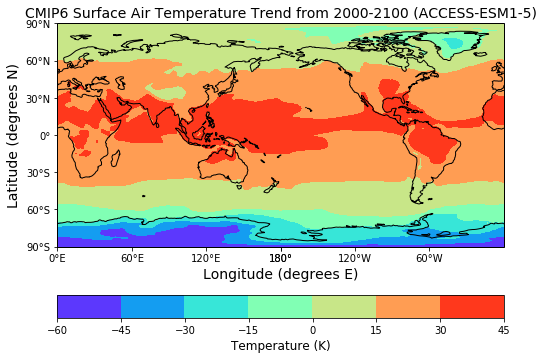

In [9]:
taslasthundred = tasdata[-100,:,:]

fig = py.figure(figsize = (8,6))
my_font_size = 12
ax1 = fig.add_subplot(111, projection=cartopy.crs.PlateCarree(central_longitude = 180))
ax1.add_feature(cartopy.feature.COASTLINE, zorder=100, edgecolor='k')
cyclic_tasdiff, cyclic_lon = cartopy.util.add_cyclic_point(taslasthundred, coord=lon, axis=1)
contour_plot = ax1.contourf(cyclic_lon, lat, cyclic_tasdiff,transform=cartopy.crs.PlateCarree(central_longitude = 0), cmap="rainbow")

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=cartopy.crs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=cartopy.crs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax1.set_ylabel("Latitude (degrees N)", fontsize = my_font_size + 2)
ax1.set_xlabel("Longitude (degrees E)", fontsize = my_font_size + 2)

cbar = py.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('Temperature (K)', fontsize = my_font_size)
ax1.set_title("CMIP6 Surface Air Temperature Trend from 2000-2100 (ACCESS-ESM1-5)", fontsize = my_font_size + 2)
py.show()
